# Long Short-Term Memory (LSTM):  Advanced type of RNN 
LSTM overcome the limitations of vanishing gradient problem.
LSTM is a more complex architecture mechanisms to control what information is remembered in the future or forgotten, to producce output every single time.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('monthly_coconut_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'
   
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [40]:
print(df.columns)

Index(['Production'], dtype='object')


<Axes: xlabel='Date'>

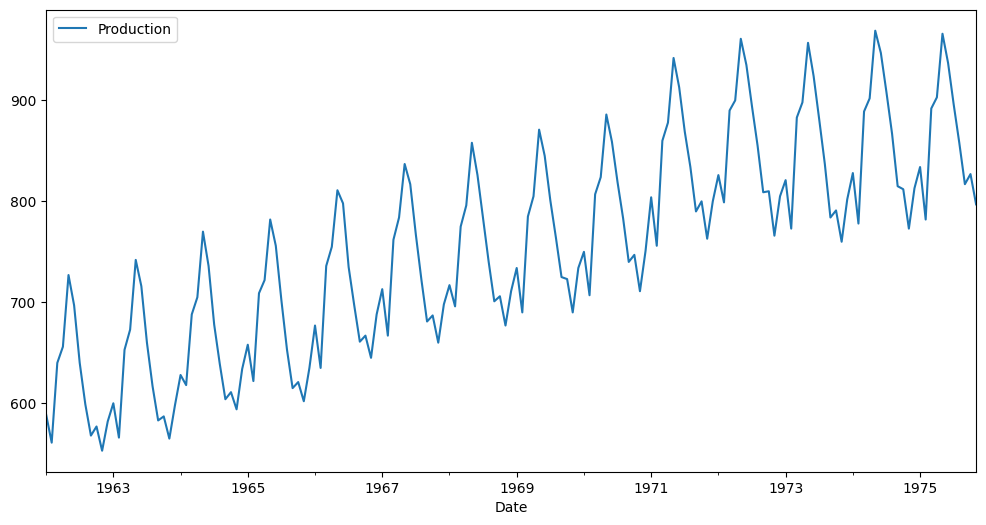

In [41]:
import matplotlib.pyplot as plt
# Plotting the coconut production over time
df.plot(figsize=(12, 6))


# Performing Seasonal Decomposition

In [42]:
# spliting data
train = df.iloc[:156]
test = df.iloc[156:]


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# MinMaxScaler
It scales each feature to a given range, typically [0, 1], by transforming the data using the formula. 

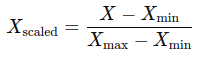

In [44]:
# Check the shape of the train and test sets
print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

# Ensure there are samples in both train and test sets
if train.empty or test.empty:
    print("The train or test set is empty. Please check the data splitting logic.")
else:
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    print(scaled_train[:5])


Train set shape: (156, 1)
Test set shape: (11, 1)
[[0.08653846]
 [0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]]


In [45]:
print(df.head())
print(df.tail())
print(df.shape)


            Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727
            Production
Date                  
1975-07-01         896
1975-08-01         858
1975-09-01         817
1975-10-01         827
1975-11-01         797
(167, 1)


In [46]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define input parameters and feature
n_input = 3 # take three month production [1,2,4]
n_features = 1 # predict the forth month

# Create the TimeseriesGenerator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# Example: Inspect the first batch generated
for i in range(1):
    x, y = generator[i]
    print(f"Input (X): {x}")
    print(f"Output (Y): {y}")

Input (X): [[[0.08653846]
  [0.01923077]
  [0.20913462]]]
Output (Y): [[0.24759615]]


In [47]:
X,y= generator[0]
print(X.shape)
print(y.shape)

(1, 3, 1)
(1, 1)


In [48]:
n_input = 12 # take three month production [1,2,3,4]
n_features = 1 # predict the fifth month

# Create the TimeseriesGenerator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [49]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Make the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/home/awalehdek/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# fit model
model.fit(generator,epochs=40)

Epoch 1/40
 33/144 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1706   

/home/awalehdek/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0854
Epoch 2/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0233
Epoch 3/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153
Epoch 4/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0129
Epoch 5/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085
Epoch 6/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0448
Epoch 7/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071
Epoch 8/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 9/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050
Epoch 10/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064
Epoch 11/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045
Epoch 12/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027
Epoch 13/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033
Epoch 14/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053
Epoch 15/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043


In [ ]:

#Training the model and capturing the training history
history = model.fit(generator, epochs=50, verbose=0)

# Plotting the loss function
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()